In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cpu'

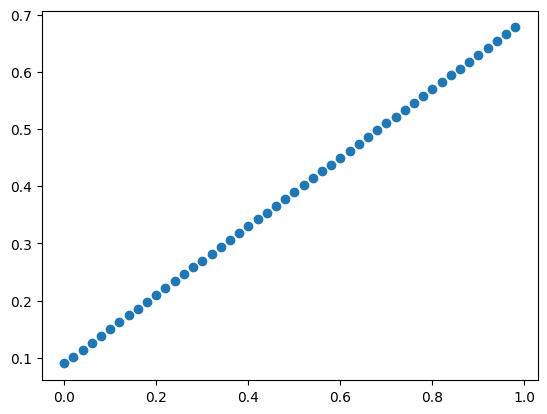

In [27]:
weight = 0.6
bias = 0.09
start =0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
plt.scatter(X.numpy(), y.numpy())
plt.show()

In [28]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions=None)->None:
    plt.scatter(
        X_train.numpy(),
        y_train.numpy(),
        c="c",
        label="train data"
    )
    plt.scatter(
        X_test.numpy(),
        y_test.numpy(),
        c="m",
        label="test data"
    )
    if predictions is not None:
        plt.plot(
            X_test.numpy(),
            predictions.numpy(),
            c="r",
            label="predictions"
        )
    plt.legend()
    plt.show()


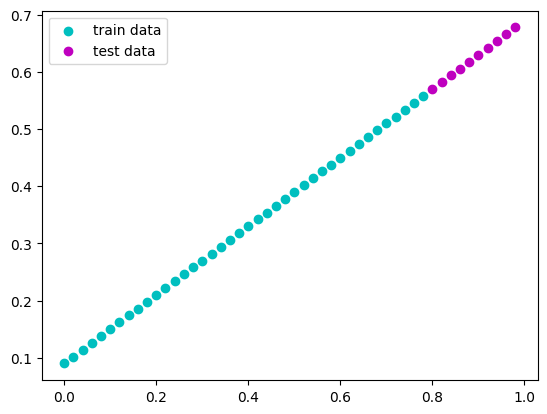

In [29]:
train_data_count:int=int(len(X)*0.8)
X_train,X_test = X[:train_data_count],X[train_data_count:]
y_train,y_test = y[:train_data_count],y[train_data_count:]
plot_predictions(X_train, y_train, X_test, y_test, None)

In [30]:
class LinearRegressionCustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,requires_grad=True))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True))
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias

In [35]:
torch.manual_seed(69)
model_0 = LinearRegressionCustomModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8398], requires_grad=True),
 Parameter containing:
 tensor([0.8042], requires_grad=True)]

In [37]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8398])), ('bias', tensor([0.8042]))])

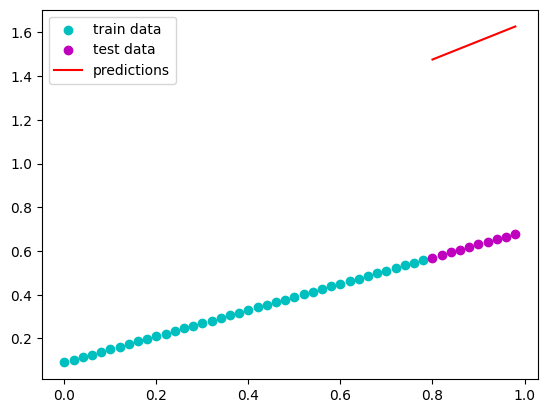

In [39]:
with torch.inference_mode():
    predictions = model_0(X_test)
    plot_predictions(X_train, y_train, X_test, y_test, predictions)
